# 6. Quiz

## 어느 결혼식장에서 피로연의 식수 인원을 올바르게 예측하지 못하여 버려지는 음식으로 고민이 많다고 합니다. 현재까지 진행된 결혼식에 대한 결혼식 참석 인원과 그 중에서 식사를 하는 인원의 데이터가 제공될 때, 아래 각 문항에 대한 코드를 작성하시오.

주의) 사전 작업으로 아래 코드 셀을 먼저 실행하시오

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 1) QuizData.csv 파일로부터 데이터를 읽어와서 결혼식 참석 인원(total), 식수 인원(reception)을 각각의 변수로 저장하시오.

In [2]:
dataset = pd.read_csv('QuizData.csv')
dataset[:5]

,total,reception
0,118,62
1,253,148
2,320,201
3,94,80
4,155,92


In [3]:
X = dataset.iloc[:, :-1].values # 결혼식 참석 인원 total
y = dataset.iloc[:, -1].values # 식수 인원 reception

In [4]:
X[:5], y[:5]

(array([[118],
        [253],
        [320],
        [ 94],
        [155]]),
 array([ 62, 148, 201,  80,  92]))

## 2) 전체 데이터를 훈련 세트와 테스트 세트로 분리하시오. 이 때 비율은 75 : 25 로 합니다.

(단, random_state = 0 으로 설정)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## 3) 훈련 세트를 이용하여 단순 선형 회귀 (Simple Linear Regression) 모델을 생성하시오.

In [6]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## 4) 데이터 시각화 (훈련 세트) 코드를 작성하시오.

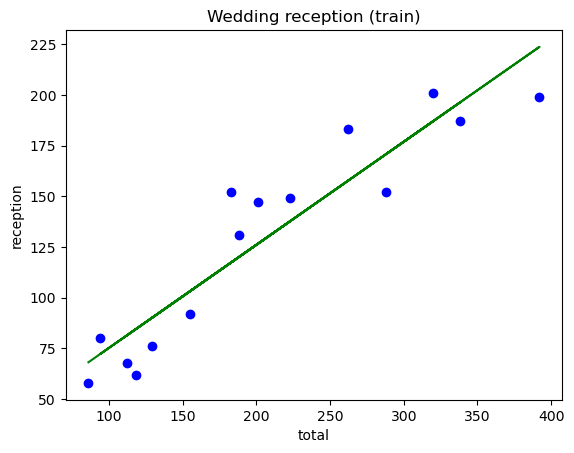

In [7]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Wedding reception (train)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

## 5) 데이터 시각화 (테스트 세트) 코드를 작성하시오.

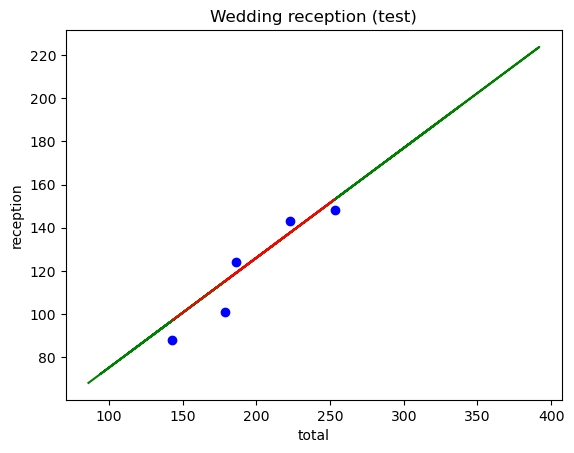

In [15]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green') # reg.fit(X_train, y_train)를 통해 구한 식에 X_train 값을 넣어서 나온 결과들을 선으로 연결해라
# 결과 동일
plt.plot(X_test, reg.predict(X_test), color='red') # 똑같은 식에 X_test 값만 넣어서 나온 결과들을 선으로 연결해라
plt.title('Wedding reception (test)')
plt.xlabel('total')
plt.ylabel('reception')
plt.show()

## 6) 훈련 세트, 테스트 세트에 대해 각각 모델 평가 점수를 구하시오.

In [9]:
reg.score(X_train, y_train) # 훈련 세트 평가 점수

0.8707088403321211

In [10]:
reg.score(X_test, y_test) # 테스트 세트 평가 점수

0.8634953212566615

## 7) 결혼식 참석 인원이 300명일 때 예상되는 식수 인원을 구하시오.

In [11]:
total = 300 # 결혼식 참석 인원
y_pred = reg.predict([[total]])

print(f'결혼식 참석 인원 {total} 명에 대한 예상 식수 인원은 {np.around(y_pred[0]).astype(int)} 명입니다.')

결혼식 참석 인원 300 명에 대한 예상 식수 인원은 177 명입니다.
